# Automated CAPTCHA Solving With Deep Learning

This notebook demonstrates the use of convolutional neural networks and supervised training to automate CAPTCHA-solving. 

Original Author: Jackon Yang (2017)

Further Modified By: Turhan Kimbrough (2021)

---

In [1]:
import os

# Functions from other notebook file.
from ipynb.fs.full.shared_functions import *

In [2]:
# Move one directory back to the project root.
os.chdir("..")

In [3]:
# Suppress tensorflow log messages.
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [4]:
# GLOBALS
DATA_DIRECTORY = os.path.join(os.getcwd() + '/datasets/DejaVuSansMono')

IMAGE_HEIGHT = 100
IMAGE_WIDTH = 100
IMAGE_CHANNELS = 3

CATEGORIES = 10 # represents digits 0-9
DIMENSIONS = 4  # 4-digit CAPTCHA images

TRAINING_EPOCHS = 10

TRAINING_BATCH_SIZE = 64
VALIDATION_BATCH_SIZE = 64
TESTING_BATCH_SIZE = 128

---
## Prepare the Dataset



Store each CAPTCHA-image file path with its respective label
into a pandas DataFrame.

In [5]:
data_frame = create_captcha_dataframe(DATA_DIRECTORY)
data_frame.head()

,label,file
0,5458,/home/t-visor/repositories/captcha-tensorflow/...
1,4773,/home/t-visor/repositories/captcha-tensorflow/...
2,1562,/home/t-visor/repositories/captcha-tensorflow/...
3,8946,/home/t-visor/repositories/captcha-tensorflow/...
4,4378,/home/t-visor/repositories/captcha-tensorflow/...


---
Shuffle the data and create a training set, validation set, and testing set.

In [6]:
train_indices, validation_indices, test_indices = shuffle_and_split_data(data_frame)

print('train count: %s, validation count: %s, test count: %s' % (
    len(train_indices), len(validation_indices), len(test_indices)))

train count: 4900, validation count: 2100, test count: 3000


---
## Get a baseline sequential model

In [7]:
model = create_untrained_model(IMAGE_HEIGHT,
                               IMAGE_WIDTH,
                               IMAGE_CHANNELS,
                               DIMENSIONS,
                               CATEGORIES)

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 64)        0     

---
## Train the Model

In [8]:
history = train_model(model, 
                      data_frame, 
                      train_indices, 
                      validation_indices, 
                      TRAINING_BATCH_SIZE, 
                      VALIDATION_BATCH_SIZE, 
                      TRAINING_EPOCHS)

Epoch 1/10
76/76 [==============================] - 8s 66ms/step - loss: 1.7962 - accuracy: 0.3731 - val_loss: 0.3220 - val_accuracy: 0.9263
Epoch 2/10
76/76 [==============================] - 5s 69ms/step - loss: 0.0945 - accuracy: 0.9775 - val_loss: 0.0479 - val_accuracy: 0.9862
Epoch 3/10
76/76 [==============================] - 5s 63ms/step - loss: 0.0179 - accuracy: 0.9961 - val_loss: 0.0336 - val_accuracy: 0.9889
Epoch 4/10
76/76 [==============================] - 5s 69ms/step - loss: 0.0068 - accuracy: 0.9986 - val_loss: 0.0254 - val_accuracy: 0.9912
Epoch 5/10
76/76 [==============================] - 5s 66ms/step - loss: 0.0024 - accuracy: 0.9996 - val_loss: 0.0292 - val_accuracy: 0.9910
Epoch 6/10
76/76 [==============================] - 5s 69ms/step - loss: 0.0012 - accuracy: 0.9999 - val_loss: 0.0238 - val_accuracy: 0.9926
Epoch 7/10
76/76 [==============================] - 5s 67ms/step - loss: 7.3232e-04 - accuracy: 0.9999 - val_loss: 0.0198 - val_accuracy: 0.9934
Epoch 8/1

---
## Analyze Model Performance

Plot the accuracy and loss metrics

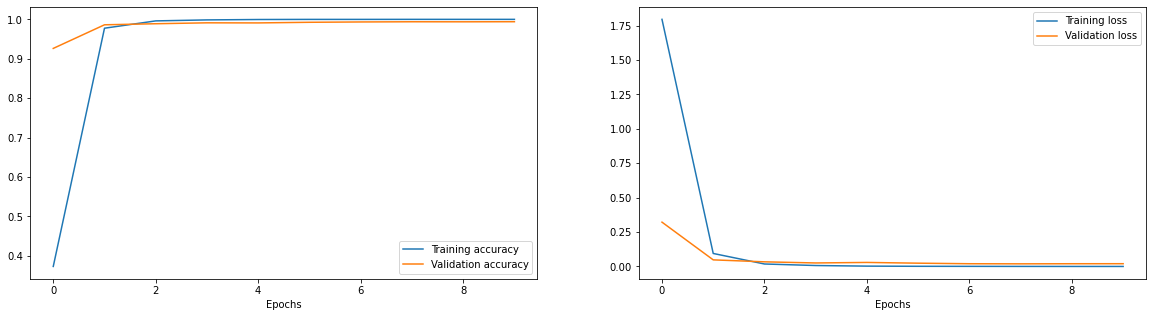

In [9]:
plot_training_history(history)

Use some 'unseen' test samples

In [10]:
for_training=False

testing_set_generator = get_captcha_generator(data_frame, 
                                              test_indices, 
                                              for_training, 
                                              TESTING_BATCH_SIZE,
                                              IMAGE_HEIGHT,
                                              IMAGE_WIDTH,
                                              CATEGORIES)

dict(zip(model.metrics_names, model.evaluate(testing_set_generator, 
                                             steps=len(test_indices)//TESTING_BATCH_SIZE)))

23/23 [==============================] - 2s 80ms/step - loss: 0.0170 - accuracy: 0.9945


{'loss': 0.016986960545182228, 'accuracy': 0.994480311870575}

---
## Visualize Model Performance

In [11]:
captcha_images, predictions, true_values = get_prediction_results(model, 
                                                                  data_frame, 
                                                                  test_indices, 
                                                                  TESTING_BATCH_SIZE)

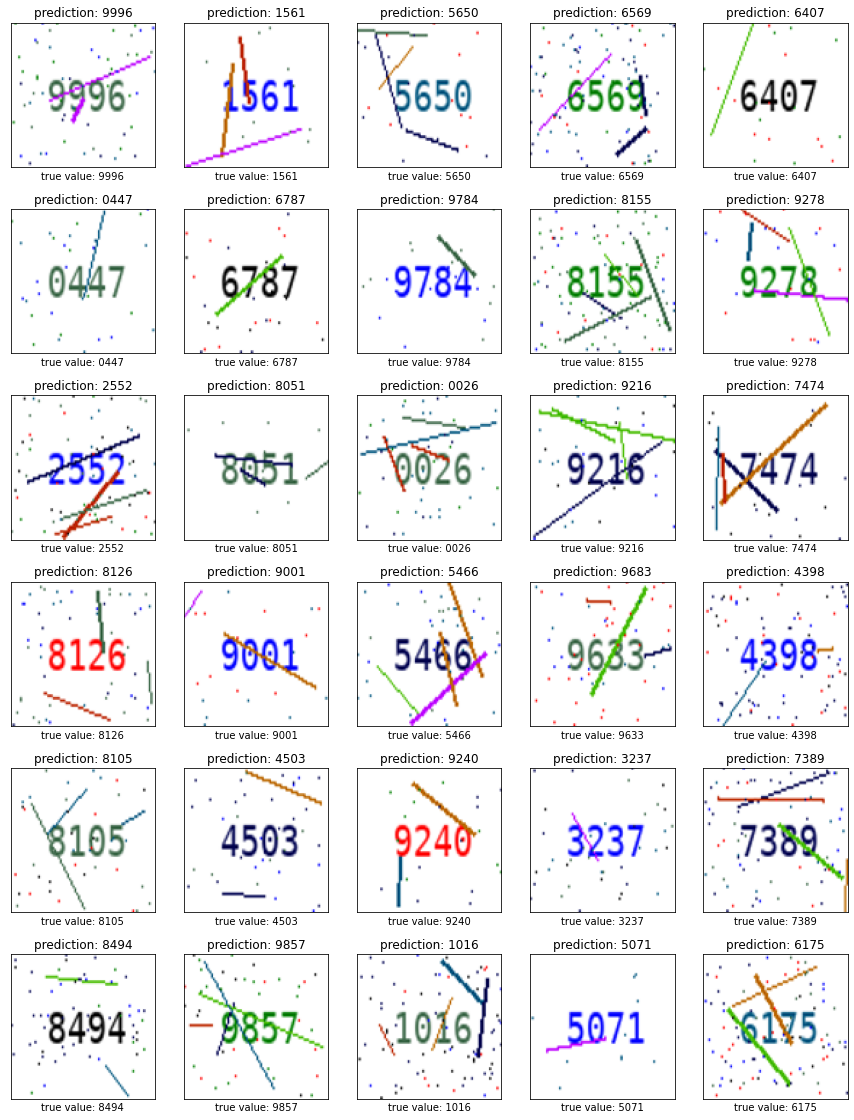

In [12]:
display_predictions_from_model(captcha_images, 
                               predictions, 
                               true_values)

## Save the Model

In [13]:
#model.save('my_model')